### Fourier Transform

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
img = cv.imread('images/messi.png',0)

In [3]:
# Fourier Transform
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

In [4]:
# Magnitude Spectrum
# Magnitude Spectrum is obtained by finding the magnitude of the complex numbers.
# It is used to analyze the frequency content of the image.
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

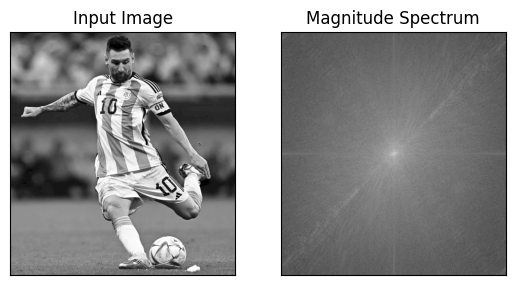

In [5]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

### Inverse Fourier Transform

In [17]:
img = magnitude_spectrum

In [18]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2

In [19]:
# We create a mask to remove the high frequency components which are responsible for edges.
# That is, we apply low-pass filter to the image. It actually blurs the image.
# Mask has centre square as 1, remaining all zeros.
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

In [20]:
# apply mask and inverse DFT
fshift = dft_shift
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

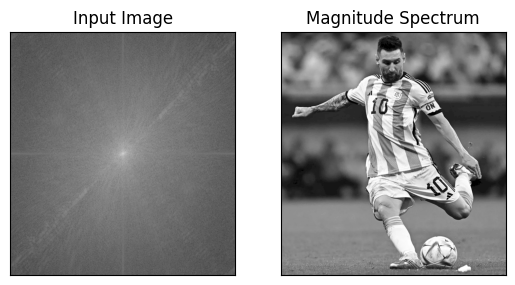

In [21]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()